# Objectives:
1. Gain hands-on experience in building a basic dataset
2. Prepare and pre-process the dataset for model fine-tuning
3. Fine-tune a pre-trained model to perform specific tasks (e.g. Facial Recognition).
4. Explore how the fine-tuned models performs on unseen data.

# Step 1: Install the essential libraries needed for the project.

Ensure that the required packages for object detection, face recognition, dataset management, and data visualization are available in the Python environment.

In [1]:
# Install necessary libraries for the facial recognition project:
!pip install ultralytics roboflow facenet_pytorch matplotlib

  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 10.9 MB/s eta 0:00:01
   --------------------------------- ------ 0.9/1.0 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/86.7 kB ? eta -:--:--
   ---------------------------------------- 86.7/86.7 kB ? eta 0:00:00
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ------------------ --------------------- 0.9/1.9 MB 27.7 MB/s eta 0:00:01
   ---------------------------------------  1.9/1.9 MB 23.9 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 19.9 MB/s eta 0:00:00
   -----------

DEPRECATION: Loading egg at c:\users\enoch\.conda\envs\deeplearn\lib\site-packages\rsaexploits-0.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.1 requires torch==2.3.1, but you have torch 2.2.2 which is incompatible.
xformers 0.0.26.post1 requires torch==2.3.0, but you have torch 2.2.2 which is incompatible.


# Step 2: Import libraries that will be used.


In [2]:
# Import necessary libraries for the facial recognition pipeline

# Object detection and face detection
from ultralytics import YOLO                # YOLO model for face detection
from facenet_pytorch import MTCNN           # MTCNN model for detecting and cropping faces

# File handling and configuration
import yaml                                 # To load and write configuration files in YAML format
import os                                   # Interact with the operating system (files, directories)
import zipfile                              # To extract ZIP files containing datasets
import shutil                               # For moving, copying, or deleting files
from pathlib import Path                    # To handle file paths more efficiently
import ultralytics                          # Includes utility functions like system checks

# Image manipulation and visualization
from IPython.display import display, Image  # Display images in Jupyter/Colab notebooks
from IPython import display                 # To clear or manage notebook outputs
from google.colab.patches import cv2_imshow # Show OpenCV images in Google Colab
import cv2                                  # OpenCV for image processing and computer vision tasks
from PIL import Image                       # PIL for opening and manipulating images
import matplotlib.pyplot as plt             # Plotting library for graphs and image display
import numpy as np                          # For numerical operations (e.g., image arrays, matrix manipulation)
import torch                                # PyTorch for deep learning and GPU acceleration


# Run Ultralytics system checks (e.g., versions, GPU availability)
ultralytics.checks()

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\enoch\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


c:\Users\enoch\.conda\envs\deeplearn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'google.colab'

# Step 3: Unzip the compressed dataset(data.zip) so that it's contents can be accessed and used in the project.

When processing larger sizes of data, especially on cloud platforms, it is usually more practical to zip up our data into a single file rather than upload every file individually.

In [ ]:
# Extract the contents of a ZIP file containing the dataset
with zipfile.ZipFile('/content/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# Step 4: Identify the different classes present in the dataset (in this case based on folder names).

Example of dataset file structure:
```
Facial_recognition
├───Isaac
├───Keith
├───Ray
└───Yuan Xiong
```

In [ ]:
# Initialize an empty list to store class names (subdirectories)
class_names = []

# Iterate through all subdirectories in the '/content/SPARKLE Dataset' directory
for file in os.listdir("/content/SPARKLE Dataset"):
  class_names.append(file)
# for name in Path('/content/SPARKLE Dataset').glob("*/"):
#     class_names.append(name)  # Append each directory/file name to the 'class_names' list

# Print the list of class names
print(class_names)

['Sindya', 'Dihui', 'Candice', 'Branson', 'Yuehan', 'Zonglin', 'Bennett', 'Hong Jun', 'Enoch', 'Claire', 'Andre', 'lovelle', 'Keith', 'Hengwei', 'Lucas', 'Jake']


# Step 5: Create and save a YAML configuration file.

In [ ]:
# Create a dictionary containing paths to the training and validation image directories,
# as well as the class names (labels) for the dataset.

data = {
    'train': '/content/train/images',  # Path to the training images
    'val': '/content/val/images',      # Path to the validation images
    'names': class_names            # List of class names (labels)
}

# Save the data dictionary as a YAML file for future use as the model training configuration file
with open('/content/data.yaml', 'w') as f:
    yaml.dump(data, f, sort_keys=False)  # Write the dictionary to a YAML file without sorting keys

# Step 6: Read the YAML file and load the class names into namelist

In [ ]:
# Open and read the previously saved YAML file to load the dataset configuration

with open('/content/data.yaml', 'r') as f:
    data = yaml.safe_load(f)  # Load the YAML file content into the 'data' dictionary
    namelist = class_names     # Assign the list of class names from the previous variable 'class_names'
    print(namelist)            # Print the class names (labels)

['Sindya', 'Dihui', 'Candice', 'Branson', 'Yuehan', 'Zonglin', 'Bennett', 'Hong Jun', 'Enoch', 'Claire', 'Andre', 'lovelle', 'Keith', 'Hengwei', 'Lucas', 'Jake']


# Step 7: Generate annotation files for a given picture.

Note that this file differs depending on what model you use. It is a form of labeling so that the model is able to train on the data you provide it. Read up on the documentation of whichever model you decide to use to better understand what kind of 'label file' the model requires.

In [ ]:
# This function generates a .txt file with the normalized bounding box coordinates for a detected object.
# The coordinates are clamped within the image bounds (512x512), and then normalized to the range [0, 1].

def generate_txt(x1, y1, x2, y2, file_path, class_idx):
    # Ensure coordinates are within the image bounds (0, 512)
    x1 = max(0, min(x1, 512))
    y1 = max(0, min(y1, 512))
    x2 = max(0, min(x2, 512))
    y2 = max(0, min(y2, 512))

    # Extract the file name without extension from the provided file path
    file_path = Path(file_path)
    file_name = os.path.join(file_path.parent, file_path.stem)

    # Calculate normalized center coordinates and normalized width/height based on image dimensions (512x512)
    x_center = (x1 + x2) / 2 / 512
    y_center = (y1 + y2) / 2 / 512
    width = (x2 - x1) / 512
    height = (y2 - y1) / 512

    # Clamp values to the range [0, 1] to ensure they are within valid bounds
    x_center = min(max(x_center, 0), 1)
    y_center = min(max(y_center, 0), 1)
    width = min(max(width, 0), 1)
    height = min(max(height, 0), 1)

    # Write the normalized bounding box data to a text file in YOLO format.
    with open(f"{file_name}.txt", "w") as f:
        f.write(f"{class_idx} {x_center} {y_center} {width} {height}")

# Step 8: Create labels for training of model.

In [ ]:
# Function to extract face bounding box data and generate YOLO annotation files
def get_metadata(image_path):
    # Initialize the MTCNN face detection model with the specified device (GPU if available)
    mtcnn = MTCNN(keep_all=True, device='cuda:0' if torch.cuda.is_available() else 'cpu:0')

    # Open the image and resize it to 512x512
    image = Image.open(image_path)
    image = image.resize((512, 512))

    # Use MTCNN to detect faces in the image
    result = mtcnn.detect(image)

    # If faces are detected, extract the bounding box and class index
    if result[0] is not None:
        boxes = result[0][0]
        class_idx = namelist.index(os.path.basename(os.path.dirname(image_path)))  # Get class index from directory name
        generate_txt(boxes[0], boxes[1], boxes[2], boxes[3], image_path, class_idx)  # Generate YOLO annotation
    else:
        class_idx = None  # No face detected

    # Return the processed image, detection result, and class index
    return image, result, class_idx

# Function to display the image with bounding boxes drawn around detected faces
def show_box(image_path):
    # Get the image, detection result, and class index
    image, result, class_idx = get_metadata(image_path)

    # If no faces are detected, print a message
    if result[0] is None:
        return print("No face detected")
    else:
        boxes = result[0]  # Get the bounding boxes for detected faces

        # Iterate through each detected face
        for i in range(len(boxes)):
            x1, y1, x2, y2 = map(int, boxes[i])  # Convert coordinates to integers

            # Convert the PIL image to OpenCV format (for rectangle drawing)
            image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

            # Draw a rectangle around the detected face
            image = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Add the class label (e.g., person's name) above the rectangle
            image = cv2.putText(image, namelist[class_idx], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Display the image with bounding boxes
        return cv2_imshow(image)


# Try displaying an image of yours!

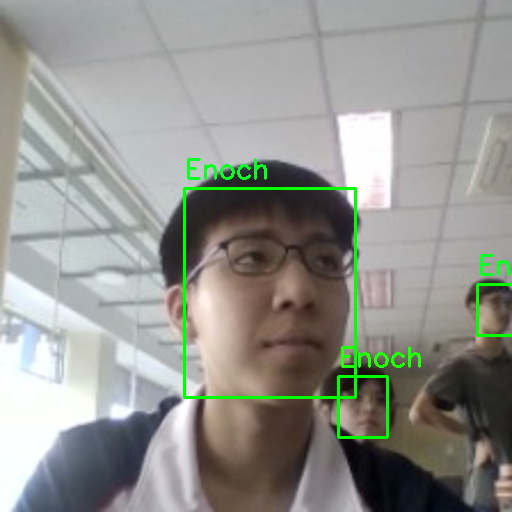

In [ ]:
# Try it Out!!
show_box('/content/SPARKLE Dataset/Enoch/0.jpg')

# Step 9: Process each image file and generates the annotation file.

In [ ]:
# Walk through all the directories and files in the '/content/SPARKLE Dataset' directory
for (root, dir, files) in os.walk('/content/SPARKLE Dataset'):
    for file in files:
        # Process only image files (ignore text files which are already generated)
        if not file.endswith('txt'):
            # Get metadata for each image file, which includes face detection and YOLO annotation generation
            get_metadata(os.path.join(root, file))

# Step 10: Compile images and their corresponding annotation files (.txt) from the subfolders into a new directory.

In [ ]:
# Define the root folder containing class subfolders and output directories for images and labels
root = Path('/content/SPARKLE Dataset')

# Output directories for images and labels
output_images = Path('/content/val/images')
output_labels = Path('/content/val/labels')

# Create output directories if they don't exist
output_images.mkdir(parents=True, exist_ok=True)
output_labels.mkdir(parents=True, exist_ok=True)

# Initialize a counter to track the number of files copied
file_count = 0

# Iterate over each class folder in the root directory
for class_folder in root.iterdir():
    if class_folder.is_dir():  # Check if it's a directory (class folder)
        for file in class_folder.iterdir():
            if file.suffix.lower() == '.jpg':  # Process image files
                dest = output_images / file.name  # Destination for image
            elif file.suffix.lower() == '.txt':  # Process text annotation files
                dest = output_labels / file.name  # Destination for text file
            else:
                continue  # Skip non-image and non-text files

            # Avoid overwriting files by renaming if the destination file already exists
            if dest.exists():
                new_name = f"{class_folder.name}_{file.name}"  # Append class folder name to avoid overwrite
                dest = dest.parent / new_name

            # Copy the file to the appropriate destination folder
            shutil.copy(file, dest)
            file_count += 1  # Increment the file counter

# Print a summary of the files copied
print(f"✅ Compiling complete. {file_count} files copied.")

✅ Compiling complete. 4419 files copied.


# Step 11: Trains the model for object detection

In [ ]:
# Load the pre-trained YOLO model with a custom checkpoint ('yolo11n.pt')
model = YOLO('yolo11n.pt')

# Train the model with specific settings
model.train(
    freeze=10,             # Freeze the first 10 layers during training to retain pre-trained features and reduce computational cost
    augment=True,          # Enable data augmentation to improve generalization (will apply default ultralytics data augmentation)
    data='/content/data.yaml',  # Path to the dataset configuration file (data.yaml)
    epochs=30,             # Train the model for 30 epochs
    imgsz=512,             # Resize the images to 512x512 pixels during training
    patience=5            # Early stopping if validation loss doesn't improve (decrease in value) for 15 epochs
)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.2.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

100%|██████████| 755k/755k [00:00<00:00, 94.3MB/s]

Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

YOLO11n summary: 181 layers, 2,592,960 parameters, 2,592,944 gradients, 6.5 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.0.conv.weight'
Freezing layer 'model.0.bn.weight'
Freezing layer 'model.0.bn.bias'
Freezing layer 'model.1.conv.weight'
Freezing layer 'model.1.bn.weight'
Freezing layer 'model.1.bn.bias'
Freezing layer 'model.2.cv1.conv.weight'
Freezing layer 'model.2.cv1.bn.weight'
Freezing layer 'model.2.cv1.bn.bias'
Freezing layer 'model.2.cv2.conv.weight'
Freezing layer 'model.2.cv2.bn.weight'
Freezing layer 'model.2.cv2.bn.bias'
Freezing layer 'model.2.m.0.cv1.conv.weight'
Freezing layer 'model.2.m.0.cv1.bn.weight'
Freezing layer 'model.2.m.0.cv1.bn.bias'
Freezing layer 'model.2.m.0.cv2.conv.weight'
Freezing layer 'model.2.m.0.cv2.bn.weight'
Freezing layer 'model.2.m.0.cv2.bn.bias'
Freezing layer 'model.3.conv.weight'
Freezing layer 'model.3.bn.weight'
Freezing layer 'model.3.bn.bias'
Freezing layer 'model.4.cv1.conv.weight'
Freezing layer 'mo

train: Scanning /content/train/labels... 2413 images, 65 backgrounds, 0 corrupt: 100%|██████████| 2478/2478 [00:01<00:00, 1988.94it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 263.2±72.0 MB/s, size: 10.6 KB)


val: Scanning /content/val/labels... 2177 images, 65 backgrounds, 0 corrupt: 100%|██████████| 2242/2242 [00:01<00:00, 1661.29it/s]


val: New cache created: /content/val/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30     0.984G       1.21      3.627      1.375         21        512: 100%|██████████| 155/155 [00:37<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:15<00:00,  4.46it/s]

                   all       2242       2177      0.556      0.567      0.589      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.06G     0.8708      1.932      1.063         27        512: 100%|██████████| 155/155 [00:33<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.91it/s]


                   all       2242       2177      0.943      0.895      0.958      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.06G     0.8285      1.369      1.018         34        512: 100%|██████████| 155/155 [00:31<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:15<00:00,  4.57it/s]


                   all       2242       2177      0.988      0.987      0.992        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.06G     0.7693      1.076     0.9932         22        512: 100%|██████████| 155/155 [00:31<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.88it/s]

                   all       2242       2177      0.985       0.99      0.994      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.06G     0.7376     0.9232     0.9714         25        512: 100%|██████████| 155/155 [00:33<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.87it/s]

                   all       2242       2177      0.994      0.996      0.994      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.06G     0.7077     0.8295     0.9652         22        512: 100%|██████████| 155/155 [00:31<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.84it/s]


                   all       2242       2177      0.985      0.992      0.993       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.06G     0.6964     0.7437     0.9533         28        512: 100%|██████████| 155/155 [00:32<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.89it/s]

                   all       2242       2177      0.993      0.996      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.06G     0.6586      0.679     0.9436         22        512: 100%|██████████| 155/155 [00:32<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.92it/s]

                   all       2242       2177      0.995      0.995      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.06G      0.653     0.6333     0.9402         22        512: 100%|██████████| 155/155 [00:31<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.94it/s]

                   all       2242       2177      0.994      0.996      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.06G     0.6356     0.5814      0.935         31        512: 100%|██████████| 155/155 [00:32<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.96it/s]

                   all       2242       2177      0.995      0.995      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.06G     0.6265     0.5576     0.9339         24        512: 100%|██████████| 155/155 [00:31<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:15<00:00,  4.70it/s]

                   all       2242       2177      0.994      0.996      0.995      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.06G     0.6315     0.5379     0.9336         24        512: 100%|██████████| 155/155 [00:33<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:15<00:00,  4.48it/s]


                   all       2242       2177      0.995      0.997      0.994      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.06G     0.6165     0.5145      0.931         21        512: 100%|██████████| 155/155 [00:32<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:15<00:00,  4.60it/s]

                   all       2242       2177      0.997      0.994      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.06G     0.6085     0.4911     0.9261         30        512: 100%|██████████| 155/155 [00:32<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.93it/s]

                   all       2242       2177      0.998      0.995      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.06G      0.599     0.4768      0.924         19        512: 100%|██████████| 155/155 [00:31<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.91it/s]

                   all       2242       2177      0.997      0.994      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.06G      0.589     0.4536     0.9173         28        512: 100%|██████████| 155/155 [00:32<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.95it/s]

                   all       2242       2177      0.998      0.994      0.995      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.06G     0.5865      0.443     0.9195         27        512: 100%|██████████| 155/155 [00:31<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:15<00:00,  4.73it/s]

                   all       2242       2177      0.995      0.996      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.06G     0.5739     0.4295     0.9198         29        512: 100%|██████████| 155/155 [00:31<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.90it/s]

                   all       2242       2177      0.997      0.995      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.06G     0.5649     0.4131     0.9148         24        512: 100%|██████████| 155/155 [00:32<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  5.01it/s]

                   all       2242       2177      0.994      0.995      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.06G     0.5571     0.4014      0.912         33        512: 100%|██████████| 155/155 [00:32<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.95it/s]

                   all       2242       2177      0.996      0.996      0.995      0.891


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.06G     0.4871     0.3426     0.8699         13        512: 100%|██████████| 155/155 [00:32<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.93it/s]

                   all       2242       2177      0.997      0.995      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.06G     0.4829     0.3201     0.8609         14        512: 100%|██████████| 155/155 [00:29<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  5.00it/s]

                   all       2242       2177      0.997      0.996      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.06G     0.4729     0.3071      0.865         14        512: 100%|██████████| 155/155 [00:31<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.96it/s]

                   all       2242       2177      0.995      0.996      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.06G     0.4643     0.2984     0.8619         14        512: 100%|██████████| 155/155 [00:30<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.98it/s]

                   all       2242       2177      0.996      0.998      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.06G     0.4639     0.2866     0.8588         14        512: 100%|██████████| 155/155 [00:31<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.90it/s]

                   all       2242       2177      0.996      0.998      0.995      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.06G     0.4488     0.2746     0.8522         13        512: 100%|██████████| 155/155 [00:31<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.85it/s]

                   all       2242       2177      0.997      0.995      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.06G     0.4423     0.2683     0.8489         12        512: 100%|██████████| 155/155 [00:31<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.92it/s]

                   all       2242       2177      0.996      0.997      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.06G     0.4366     0.2592     0.8549         14        512: 100%|██████████| 155/155 [00:30<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.76it/s]

                   all       2242       2177      0.997      0.996      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.06G     0.4304     0.2535     0.8469         14        512: 100%|██████████| 155/155 [00:31<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:14<00:00,  4.91it/s]

                   all       2242       2177      0.996      0.998      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.06G     0.4239     0.2505     0.8466         14        512: 100%|██████████| 155/155 [00:32<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:15<00:00,  4.69it/s]

                   all       2242       2177      0.997      0.996      0.995      0.917



30 epochs completed in 0.393 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.2.2+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,272 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:21<00:00,  3.35it/s]


                   all       2242       2177      0.996      0.997      0.995      0.909
                Sindya        120        120      0.998          1      0.995      0.953
                 Dihui        165        165      0.999          1      0.995      0.948
               Candice        214        214      0.999          1      0.995      0.918
               Branson        127        127      0.975      0.984      0.994      0.878
                Yuehan         71         71      0.997          1      0.995      0.907
               Zonglin        205        205      0.999          1      0.995      0.916
               Bennett        188        188      0.999          1      0.995      0.922
              Hong Jun        201        201      0.993      0.975      0.991      0.873
                 Enoch         87         87      0.998          1      0.995      0.902
                Claire        181        181      0.999          1      0.995      0.924
                 Andr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb59fc3b010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

# Step 12: Perform inference on a set of images after training the model.

In [ ]:
# Load the trained YOLO model from the saved checkpoint
trained_pt = '/content/runs/detect/train3/weights/best.pt'
model = YOLO(trained_pt)

# Define the path to the images for inference
img_path = '/content/SPARKLE Dataset/Zonglin/27.jpg'

# Run inference on the specified image or directory
results = model(img_path, project='/content/runs/output', save=True)


image 1/1 /content/SPARKLE Dataset/Zonglin/27.jpg: 512x512 1 Zonglin, 30.3ms
Speed: 2.8ms preprocess, 30.3ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 512)
Results saved to /content/runs/output/predict7
